# **Import Data**

## input file Path below 

In [ ]:
data_name='data_new.csv'

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv(data_name)

/Users/elsielin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#categorize donors
def categorize(total):
    if total > 9999:
        return 'High'
    elif 1000 < total <= 9999:
        return 'Mid'
    else:
        return 'Low'

data['category'] = data['total_2022'].apply(categorize)

In [4]:
#drop output and ID
data = data.drop(columns=["ID", "total_2022"])

In [5]:
# One-hot encoding for categorical variables
data = pd.get_dummies(data, columns=["Constituency Code","County", "location", "Max Sub Event Attended", "Max Major Event Attended"])

# Split the data into features (X) and target variable (y)
X = data.drop(columns=["category"])
y = data["category"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Define the parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Instantiate the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Model Accuracy: 0.9922154948721117
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report:
              precision    recall  f1-score   support

        High       0.73      0.40      0.52        20
         Low       0.99      1.00      1.00      8013
         Mid       0.75      0.30      0.43        60

    accuracy                           0.99      8093
   macro avg       0.82      0.57      0.65      8093
weighted avg       0.99      0.99      0.99      8093



In [7]:
# Get feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

                                         Feature    Importance
7                     Min Gift Amount Since 2019  1.241400e-01
0                                     total_gift  1.234060e-01
6                     Max Gift Amount Since 2019  1.222725e-01
8                     Gift Amount_y_avg_10_years  8.958381e-02
9                                 total_event_10  7.863644e-02
..                                           ...           ...
32                        County_Rockford County  3.051059e-07
10               Constituency Code_Board Company  3.711298e-08
44    Max Sub Event Attended_event_holiday cards  3.503337e-08
55  Max Sub Event Attended_event_smiles campaign  0.000000e+00
58     Max Sub Event Attended_event_verne carson  0.000000e+00

[62 rows x 2 columns]


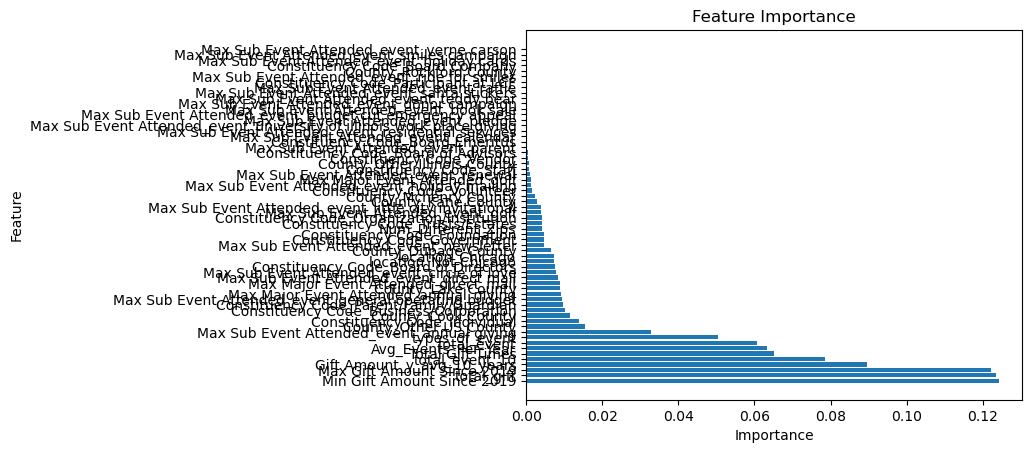

In [8]:
# Plot feature importances
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()